# Predicting ratings of Google Play Store apps
## Importing libraries
We will be using the following libraries:

- numpy - for numerical computations
- pandas - for data structures and data analysis
- matplotlib - for plotting
- sklearn - for supervised learning

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set()

## Getting training and testing data

In [20]:
# Path to training and testing datasets
PATH_X_TRAIN = 'data/googleplaystore_X_train_encoded.csv'
PATH_Y_TRAIN = 'data/googleplaystore_y_train_encoded.csv'
PATH_X_TEST = 'data/googleplaystore_X_test_encoded.csv'
PATH_Y_TEST = 'data/googleplaystore_y_test_encoded.csv'

In [21]:
# Load training and testing datasets
X_train = pd.read_csv(PATH_X_TRAIN)
y_train = pd.read_csv(PATH_Y_TRAIN)
X_test = pd.read_csv(PATH_X_TEST)
y_test = pd.read_csv(PATH_Y_TEST)

# Random Forest
Feature selections: Reviews, Size, Price, Category, Installs, Type, Content Rating, Primary Genre, Secondary Genre

Response variable: Rating

Why Random Forest? Features include both categorical and numerical variables, so Random Forest could be a suitable model.

There is no particular features that offer a visible correlation with the response variable. Therefore, we will use all the features. In addition, Random Forest is less prone to overfitting compared to a single decision tree due to its ensemble approach.

# Training and Evaluating the model
## Setting a max depth of 5

In [22]:
# Initialize the Random Forest Regressor
rf_regressor_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=42)

# Train the model using the training data
rf_regressor_5.fit(X_train, np.ravel(y_train))

# Make predictions using the testing data
y_pred = rf_regressor_5.predict(X_test)
y_train_pred = rf_regressor_5.predict(X_train)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print("Train set")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print()
print("Test set")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Train set
Mean Squared Error: 0.2545205714678648
Mean Absolute Error: 0.35352035863538717
R-squared Score: 0.16762608752894892

Test set
Mean Squared Error: 1.0879173484540086
Mean Absolute Error: 0.8320570507862406
R-squared Score: -2.781575173184471


## Visualizing a tree (max depth of 5)

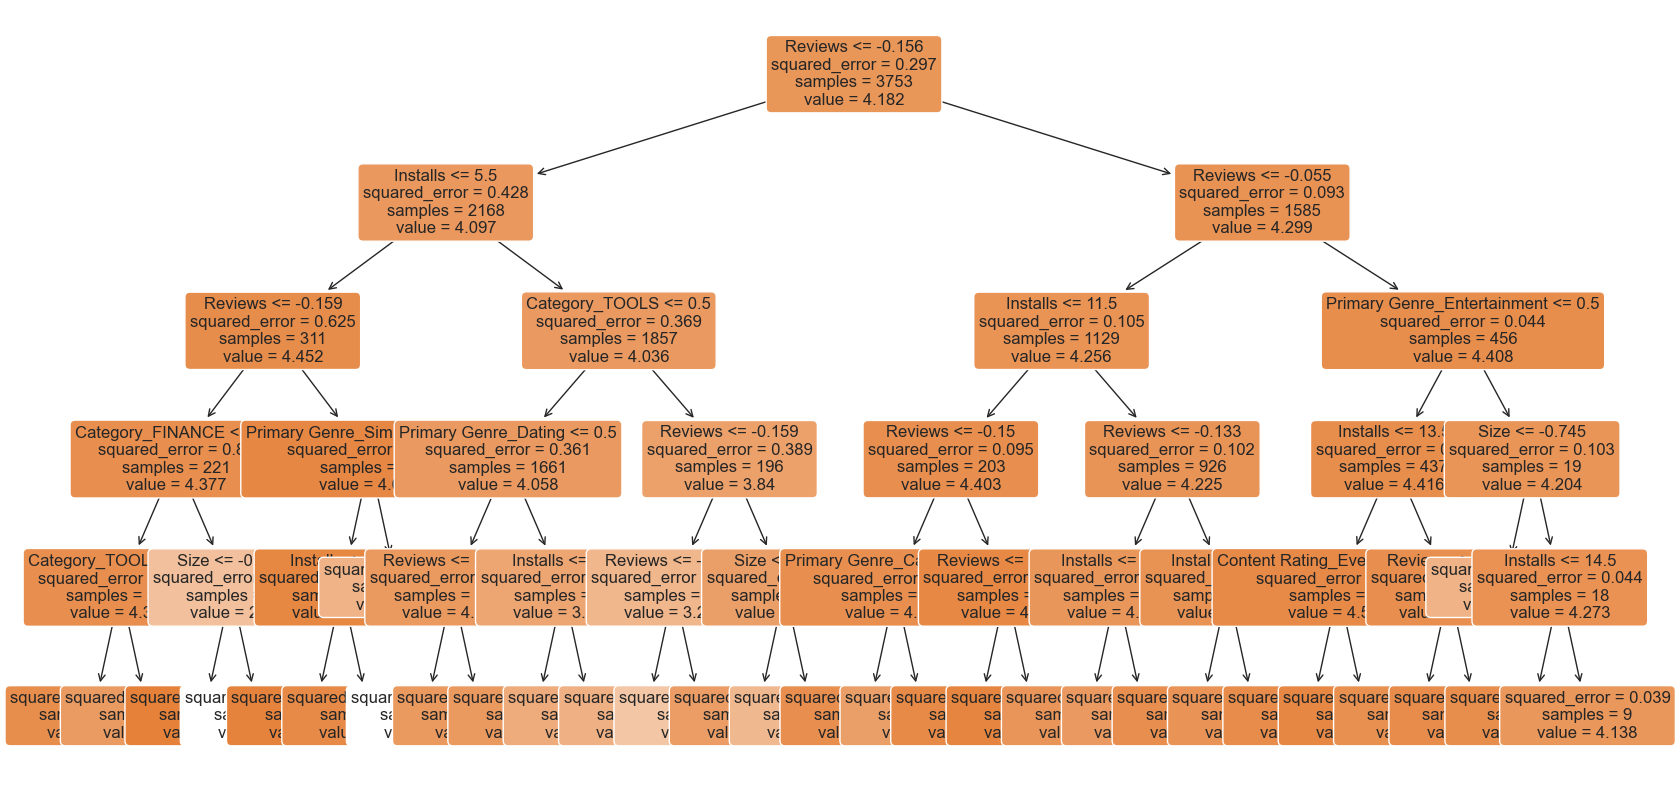

In [23]:
# Choose a tree (e.g., the first tree) from the Random Forest
tree_to_visualize = rf_regressor_5.estimators_[0]

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the chosen tree
plot_tree(tree_to_visualize, filled=True, feature_names=X_train.columns, rounded=True, fontsize=12)

# Show the plot
plt.show()

__Remark__: 

Max depth of 5 results in a negative R-squared Score, which indicates that the model currently performs worse than a simple model that just predicts the mean of the rating. 

Moreover, both the MSE and MAE are significantly higher in the test set compared to the training set (so high that in fact it is not practical to use this model to predict `Rating` at all), which indicates that the model is overfitting. Therefore, we will try to reduce the depth of the trees.

## Setting a max depth of 2

In [24]:
# Initialize the Random Forest Regressor
rf_regressor_2 = RandomForestRegressor(n_estimators=100, max_depth = 2, random_state=42)

# Train the model using the training data
rf_regressor_2.fit(X_train, np.ravel(y_train))

# Make predictions using the testing data
y_pred = rf_regressor_2.predict(X_test)
y_train_pred = rf_regressor_2.predict(X_train)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print("Train set")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print()
print("Test set")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Train set
Mean Squared Error: 0.2835476085513725
Mean Absolute Error: 0.3730166580237686
R-squared Score: 0.07269722466612072

Test set
Mean Squared Error: 0.26689859074530176
Mean Absolute Error: 0.37815622486876677
R-squared Score: 0.07226676185040781


## Visualizing a tree (max depth of 2)

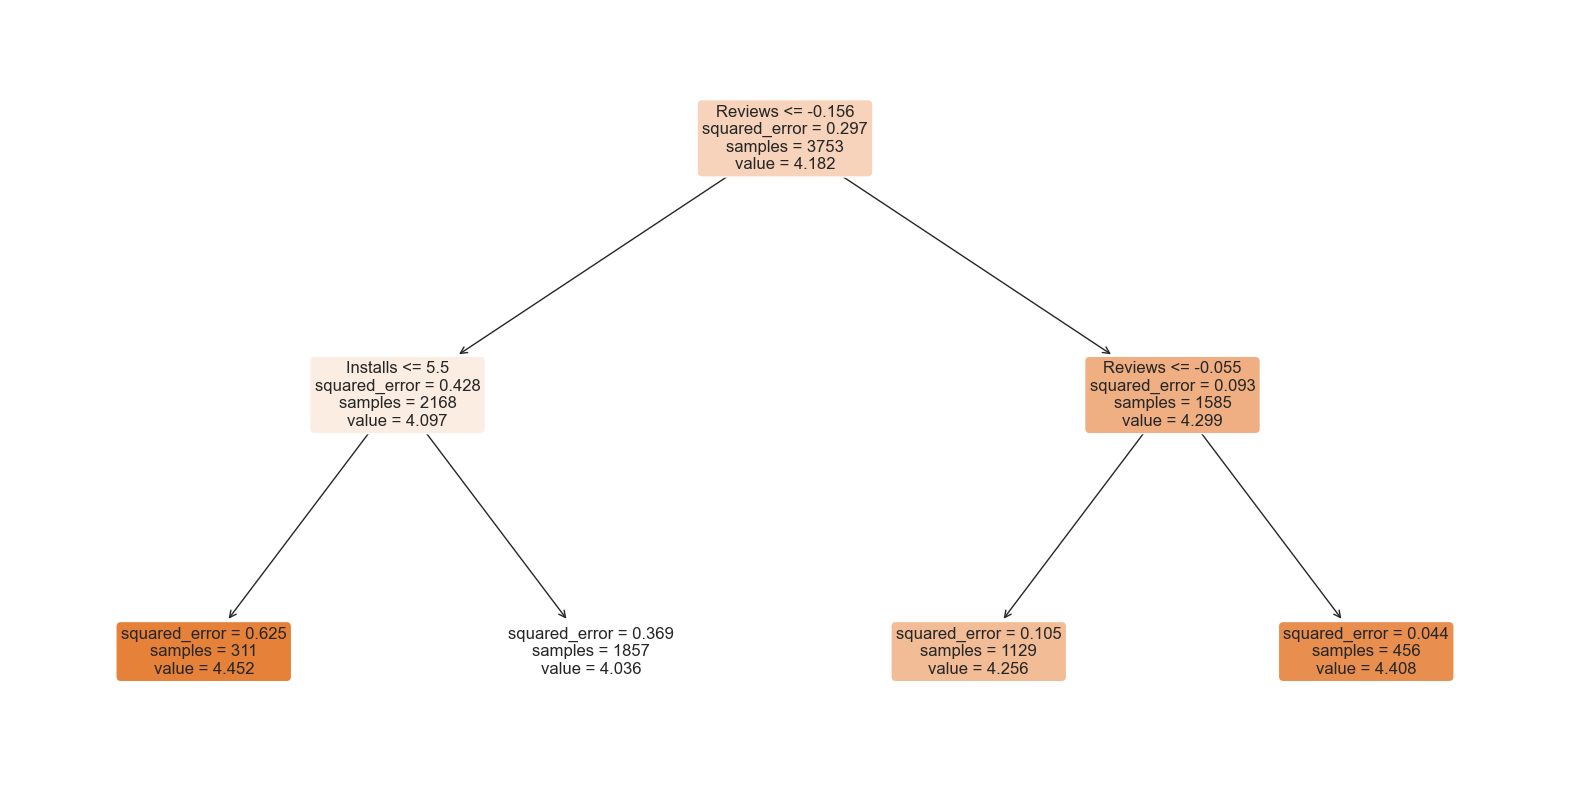

In [25]:
# Choose a tree (e.g., the first tree) from the Random Forest
tree_to_visualize = rf_regressor_2.estimators_[0]

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the chosen tree
plot_tree(tree_to_visualize, filled=True, feature_names=X_train.columns, rounded=True, fontsize=12)

# Show the plot
plt.show()

__Remark__: 

Max depth of 2 is the highest number which gives us a positive R-squared Score for the test set. Although Mean Squared Error is acceptable, a max depth of 2 is too shallow and an R-Squared Score of close to 0 is too low, hence the Random Forest model may not be a good fit for the data. 

However, it should be noted that our dataset is non-linear, therefore R-squared score is not the best metric to evaluate the model. If we look into the Mean Absolute Error and Mean Squared Error, the model performs quite well (<0.4 stars error on average). 

Also note that the model is not overfitting anymore, indicated by the similar MSE and MAE in the training and test set.